**This code walks through a linear regression pipeline (with gradient descent) using exam score data**

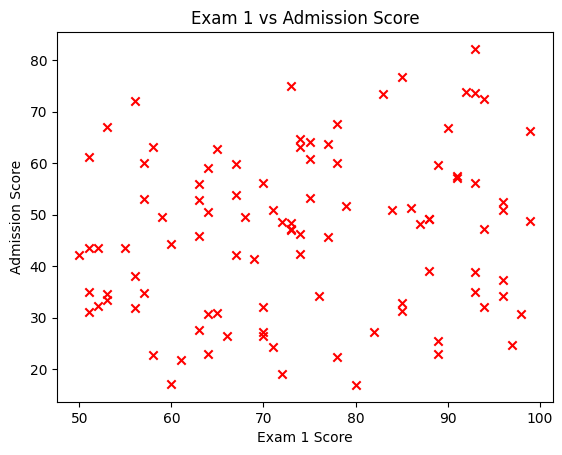

Learned parameters (bias + coefficients): [nan nan nan]


/tmp/ipython-input-2154857906.py:36: RuntimeWarning: overflow encountered in matmul
  gradients = 2/X_b.shape[0] * X_b.T @ (X_b @ theta - y)
/tmp/ipython-input-2154857906.py:37: RuntimeWarning: invalid value encountered in subtract
  theta -= learning_rate * gradients


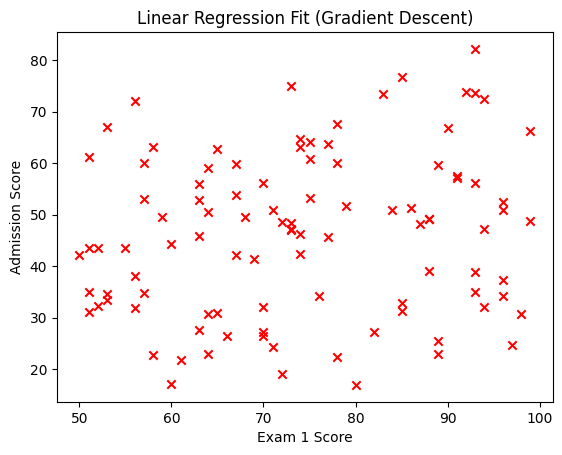

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# ------------------------
# 1. Load dataset
# ------------------------
df = pd.read_csv('/content/exam_admission_data.csv')
X = df[['Exam1', 'Exam2']].values
y = df['AdmissionScore'].values

# ------------------------
# 2. Visualize Exam 1 vs AdmissionScore
# ------------------------
plt.scatter(X[:, 0], y, color='r', marker='x')
plt.xlabel("Exam 1 Score")
plt.ylabel("Admission Score")
plt.title("Exam 1 vs Admission Score")
plt.show()

# ------------------------
# 3. Gradient Descent for Linear Regression
# ------------------------
# Add bias column (intercept)
X_b = np.c_[np.ones((X.shape[0], 1)), X]  # shape (num_samples, 3)

# Initialize parameters
theta = np.zeros(X_b.shape[1])

# Hyperparameters
learning_rate = 0.0005
iterations = 1000

# Gradient Descent loop
for i in range(iterations):
    gradients = 2/X_b.shape[0] * X_b.T @ (X_b @ theta - y)
    theta -= learning_rate * gradients

print("Learned parameters (bias + coefficients):", theta)

# ------------------------
# 4. Plot regression line for Exam 1 (ignoring Exam 2 for visualization)
# ------------------------
plt.scatter(X[:, 0], y, color='r', marker='x')
plt.plot(X[:, 0], X_b @ theta, color='b')  # predictions
plt.xlabel("Exam 1 Score")
plt.ylabel("Admission Score")
plt.title("Linear Regression Fit (Gradient Descent)")
plt.show()


**Regression performance metrics like MSE, RMSE, MAE AND R² Score**

In [ ]:
import numpy as np
import pandas as pd
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# ------------------------
# 1. Load dataset
# ------------------------
df = pd.read_csv('/content/exam_admission_data.csv')
X = df[['Exam1', 'Exam2']].values
y = df['AdmissionScore'].values

# ------------------------
# 2. Feature scaling (Standardization)
# ------------------------
X_mean = X.mean(axis=0)
X_std = X.std(axis=0)
X_scaled = (X - X_mean) / X_std  # scale features

# Add bias term
X_b = np.c_[np.ones((X_scaled.shape[0], 1)), X_scaled]

# ------------------------
# 3. Gradient Descent
# ------------------------
theta = np.zeros(X_b.shape[1])
learning_rate = 0.01   # smaller LR after scaling
iterations = 2000

for i in range(iterations):
    gradients = 2/X_b.shape[0] * X_b.T @ (X_b @ theta - y)
    theta -= learning_rate * gradients

# ------------------------
# 4. Predictions
# ------------------------
y_pred = X_b @ theta

# ------------------------
# 5. Regression performance metrics
# ------------------------
mse = mean_squared_error(y, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y, y_pred)
r2 = r2_score(y, y_pred)

print("Regression performance metrics:")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"R² Score: {r2:.2f}")


Regression performance metrics:
Mean Squared Error (MSE): 26.48
Root Mean Squared Error (RMSE): 5.15
Mean Absolute Error (MAE): 4.23
R² Score: 0.89


**Plotting the loss function (MSE) vs iterations**

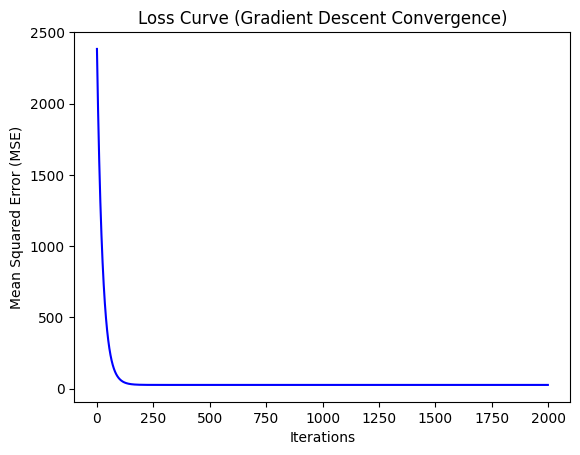

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# ------------------------
# 1. Load dataset
# ------------------------
df = pd.read_csv('/content/exam_admission_data.csv')
X = df[['Exam1', 'Exam2']].values
y = df['AdmissionScore'].values

# ------------------------
# 2. Feature scaling (important for stable gradient descent)
# ------------------------
X_mean = X.mean(axis=0)
X_std = X.std(axis=0)
X_scaled = (X - X_mean) / X_std

# Add bias term
X_b = np.c_[np.ones((X_scaled.shape[0], 1)), X_scaled]

# ------------------------
# 3. Gradient Descent with MSE tracking
# ------------------------
theta = np.zeros(X_b.shape[1])
learning_rate = 0.01
iterations = 2000

loss_history = []  # store MSE per iteration

for i in range(iterations):
    y_pred = X_b @ theta
    residuals = y_pred - y
    mse = np.mean(residuals**2)
    loss_history.append(mse)

    gradients = 2/X_b.shape[0] * X_b.T @ residuals
    theta -= learning_rate * gradients

# ------------------------
# 4. Plot Loss vs Iterations
# ------------------------
plt.plot(range(iterations), loss_history, color='blue')
plt.xlabel("Iterations")
plt.ylabel("Mean Squared Error (MSE)")
plt.title("Loss Curve (Gradient Descent Convergence)")
plt.show()


**Correlation Analysis, Linear Regression with Standardization, Feature Importance, Partial Dependence Plots**

Correlation matrix:
                    Exam1     Exam2  AdmissionScore
Exam1           1.000000 -0.052449        0.166432
Exam2          -0.052449  1.000000        0.919522
AdmissionScore  0.166432  0.919522        1.000000 



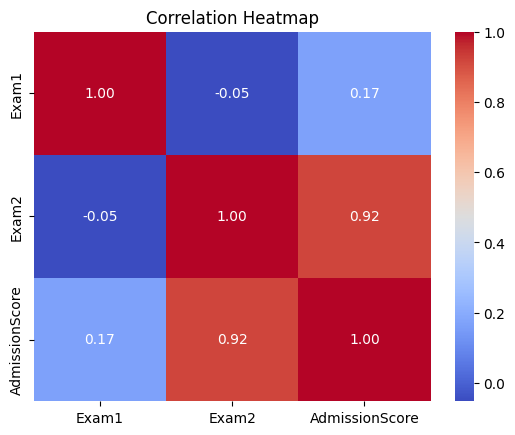

Intercept (bias): 46.242963830566794
Coefficients (effect of each exam after scaling):
  Exam1: 3.3661
  Exam2: 14.5561

Relative importance of features:
  Exam1: 18.78%
  Exam2: 81.22%


/tmp/ipython-input-251557386.py:50: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=['Exam1','Exam2'], y=importance*100, palette="viridis")


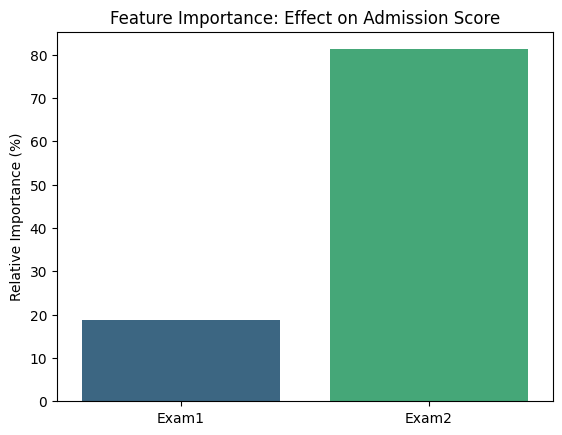

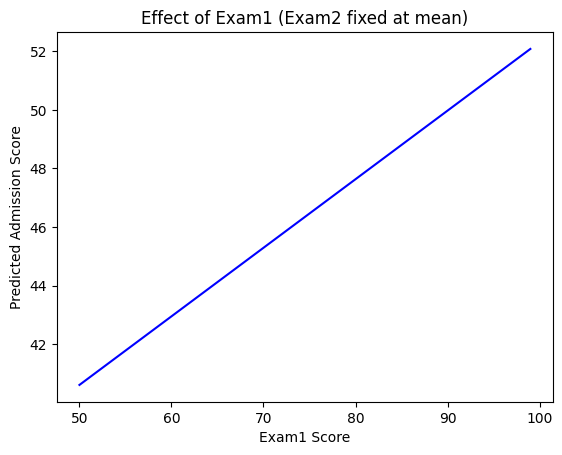

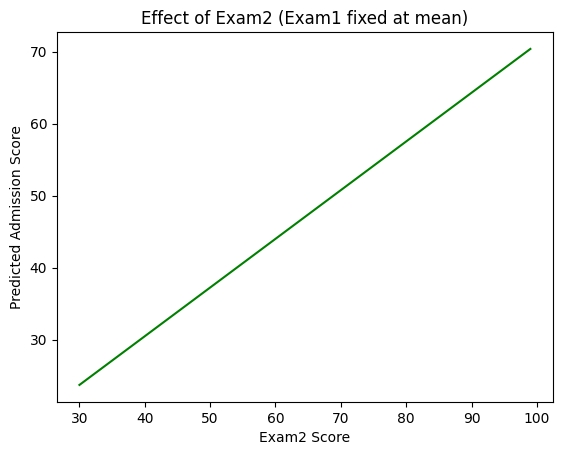

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler

# ------------------------
# 1. Load dataset
# ------------------------
df = pd.read_csv('/content/exam_admission_data.csv')
X = df[['Exam1', 'Exam2']].values
y = df['AdmissionScore'].values

# ------------------------
# 2. Correlation Analysis
# ------------------------
print("Correlation matrix:\n", df.corr(), "\n")

sns.heatmap(df.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

# ------------------------
# 3. Train Linear Regression Model (with sklearn for easier interpretation)
# ------------------------
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)  # standardize features

model = LinearRegression()
model.fit(X_scaled, y)

coefficients = model.coef_
intercept = model.intercept_

print("Intercept (bias):", intercept)
print("Coefficients (effect of each exam after scaling):")
print(f"  Exam1: {coefficients[0]:.4f}")
print(f"  Exam2: {coefficients[1]:.4f}")

# ------------------------
# 4. Feature Importance (Relative Effect Size)
# ------------------------
importance = np.abs(coefficients) / np.sum(np.abs(coefficients))
print("\nRelative importance of features:")
print(f"  Exam1: {importance[0]*100:.2f}%")
print(f"  Exam2: {importance[1]*100:.2f}%")

# Bar plot of feature importance
sns.barplot(x=['Exam1','Exam2'], y=importance*100, palette="viridis")
plt.ylabel("Relative Importance (%)")
plt.title("Feature Importance: Effect on Admission Score")
plt.show()

# ------------------------
# 5. Partial Dependence (Effect of one exam while keeping the other fixed)
# ------------------------
exam1_range = np.linspace(df['Exam1'].min(), df['Exam1'].max(), 50)
exam2_mean = df['Exam2'].mean()

X_new = np.column_stack([exam1_range, np.full(50, exam2_mean)])
X_new_scaled = scaler.transform(X_new)
y_pred_exam1 = model.predict(X_new_scaled)

plt.plot(exam1_range, y_pred_exam1, color='blue')
plt.xlabel("Exam1 Score")
plt.ylabel("Predicted Admission Score")
plt.title("Effect of Exam1 (Exam2 fixed at mean)")
plt.show()

exam2_range = np.linspace(df['Exam2'].min(), df['Exam2'].max(), 50)
exam1_mean = df['Exam1'].mean()

X_new = np.column_stack([np.full(50, exam1_mean), exam2_range])
X_new_scaled = scaler.transform(X_new)
y_pred_exam2 = model.predict(X_new_scaled)

plt.plot(exam2_range, y_pred_exam2, color='green')
plt.xlabel("Exam2 Score")
plt.ylabel("Predicted Admission Score")
plt.title("Effect of Exam2 (Exam1 fixed at mean)")
plt.show()


**Scatter plot to show the relation between exam score 1, 2 with the admission scores**

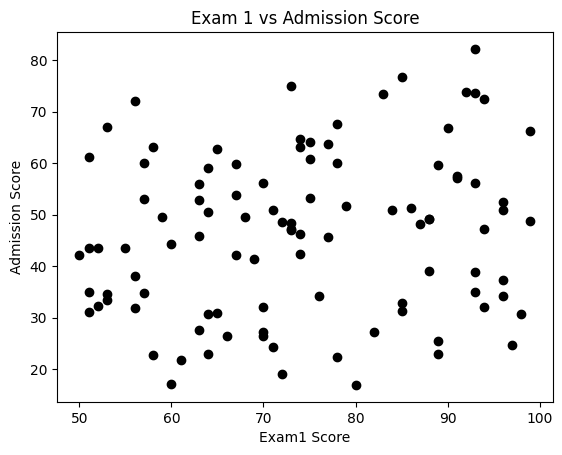

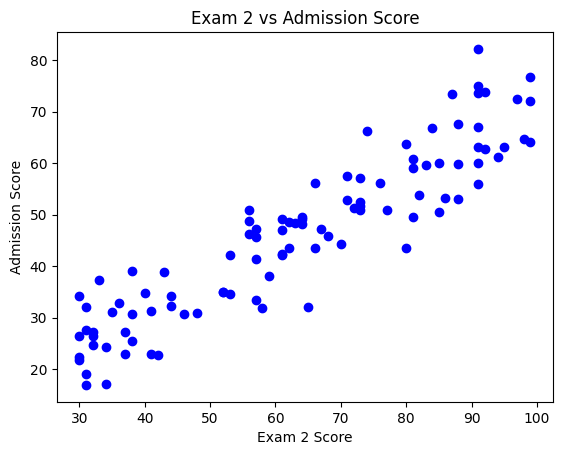

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# ------------------------
# 1. Load dataset
# ------------------------
df = pd.read_csv('/content/exam_admission_data.csv')

# ------------------------
# 2. Scatter plot: Exam1 vs Admission Score
# ------------------------
plt.scatter(df['Exam1'], df['AdmissionScore'], color='black', marker='o')
plt.xlabel("Exam1 Score")
plt.ylabel("Admission Score")
plt.title("Exam 1 vs Admission Score")
plt.show()

# ------------------------
# 3. Scatter plot: Exam2 vs Admission Score
# ------------------------
plt.scatter(df['Exam2'], df['AdmissionScore'], color='blue', marker='o')
plt.xlabel("Exam 2 Score")
plt.ylabel("Admission Score")
plt.title("Exam 2 vs Admission Score")
plt.show()


**3D BAR plot of Exam1 vs Exam2 and Admission Score**

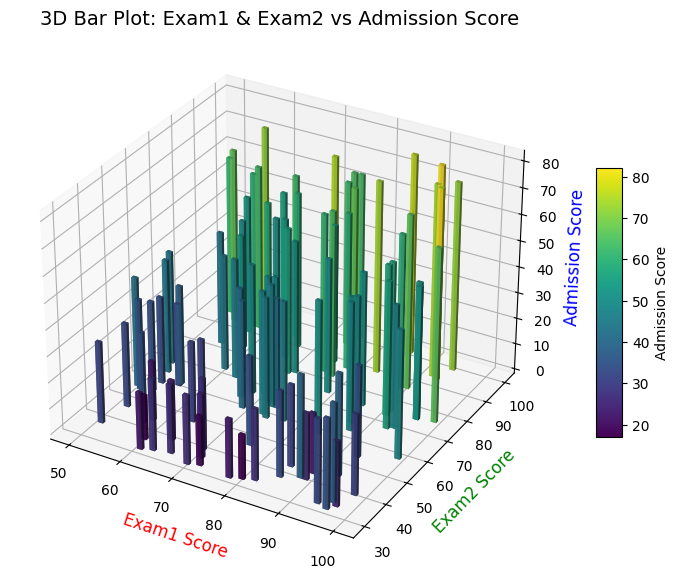

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.mplot3d import Axes3D

# ------------------------
# 1. Load dataset
# ------------------------
df = pd.read_csv('/content/exam_admission_data.csv')
exam1 = df['Exam1'].values
exam2 = df['Exam2'].values
admission = df['AdmissionScore'].values

# ------------------------
# 2. Create 3D bar plot
# ------------------------
fig = plt.figure(figsize=(12, 7))
ax = fig.add_subplot(111, projection='3d')

# X and Y positions for bars
x_pos = exam1
y_pos = exam2
z_pos = np.zeros_like(admission)  # bars start at z=0

# Bar dimensions
dx = np.ones_like(exam1) * 1.0
dy = np.ones_like(exam2) * 1.0
dz = admission

# Use color based on the height (admission score)
colors = plt.cm.viridis((admission - admission.min()) / (admission.max() - admission.min()))

# Plot 3D bars
ax.bar3d(x_pos, y_pos, z_pos, dx, dy, dz, color=colors, alpha=0.8)

# Labels
ax.set_xlabel('Exam1 Score', color='red', fontsize=12)
ax.set_ylabel('Exam2 Score', color='green', fontsize=12)
ax.set_zlabel('Admission Score', color='blue', fontsize=12)
ax.set_title('3D Bar Plot: Exam1 & Exam2 vs Admission Score', fontsize=14)

# Add color bar correctly for 3D plot
mappable = plt.cm.ScalarMappable(cmap='viridis')
mappable.set_array(admission)
cbar = fig.colorbar(mappable, ax=ax, shrink=0.5, aspect=10)
cbar.set_label('Admission Score')

plt.show()
